In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd  
import numpy as np  

In [44]:
df = pd.read_json (r'./users.json')
df1 = pd.read_json (r'./users.json')

df2 = pd.read_json (r'./users.json')
#Drop the rows with NaN values in created and karma
df = df.dropna(subset=['created', 'karma'])
df1 = df1.dropna(subset=['created', 'karma'])
df2 = df1.dropna(subset=['created', 'karma', 'submitted'])

df.loc[:, 'created'] = df.created.apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [ ]:
x = df['created']
y = df['karma']
plt.plot(x, y)   

plt.xlabel('Date created') 
plt.ylabel('Karma') 

plt.title('Hacker News Karma Progression Over Time') 

plt.savefig('HackerNews_Plot')

KeyboardInterrupt: 

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 

model = LinearRegression()
x_val = df1['created'].values.reshape(-1, 1)
y_val = df1['karma'].values 

#Split into training and test set. 80-20
X_train, X_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.2, random_state=0)

regressor = LinearRegression()  
#here we train the algo
regressor.fit(X_train, y_train) 

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

df2 = pd.DataFrame({'Test': y_test.flatten(), 'Pred': y_pred.flatten()})
df2


plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model.fit(x_val, y_val)

plt.xlabel('Reg Date')
plt.ylabel('Karma Pts')
plt.plot(x_val, model.predict(x_val))

plt.title('Hacker News Karma Progression Over Time Predictive Model') 

t_1000 = (1000 - model.intercept_) / model.coef_[0]
pd.to_datetime(t_1000, unit='s')

print('MEA:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

55688.320691541085
[-3.73534337e-05]
Mean Absolute Error: 4167.507217090202
Mean Squared Error: 60489353.90798358
Root Mean Squared Error: 7777.490206228715


In [65]:
X = df2[['created', 'submitted']]
y = df2['karma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

model.fit(X, y)
y_pred = regressor.predict(X_test)

muhdf = pd.DataFrame({'Test': y_test, 'Pred': y_pred})
df5 = muhdf.head(25)
print(df5)

print('MEA:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

         Test          Pred
2615    596.0   1300.877731
296    5497.0   6843.389891
7443    204.0   2054.710945
2343   5503.0   8668.199300
5564      9.0   -387.965699
5314   9924.0  11395.384411
33    14022.0  12194.341306
5335    608.0   1949.318375
2103   1040.0   2105.876616
8075  12558.0   6960.099947
8627   2599.0   3821.572273
7404   1713.0   3197.309592
4617    839.0   2054.278888
1149   5519.0  10354.750028
8750   2324.0   2721.541435
390     130.0    219.022976
39     5643.0   5580.138893
7270   1351.0   2394.235825
5648   1588.0   1978.769419
6301    421.0    729.962325
31    36691.0  22140.357341
4624   3973.0   7047.331174
4706    985.0    415.576442
1065  26037.0  33513.431102
6737     72.0   -406.652311
MEA: 1718.8780099769258
MSE: 17351701.441963457
RMSE: 4165.537353327114


In [67]:
(1000 - model.intercept_ + (-0.000007) * 1463922656) / (-2.709600)

6967.04573757315

In [69]:
(1000 - model.intercept_ + 2.709600 * 500) / -0.000007

1039378362.6468871

NameError: name 'pd' is not defined

In [74]:
data.head(25)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


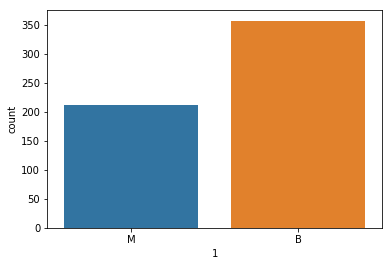

In [76]:
import seaborn as sns
sns.countplot(data[1],label="MalignantvsBenign")
plt.show()


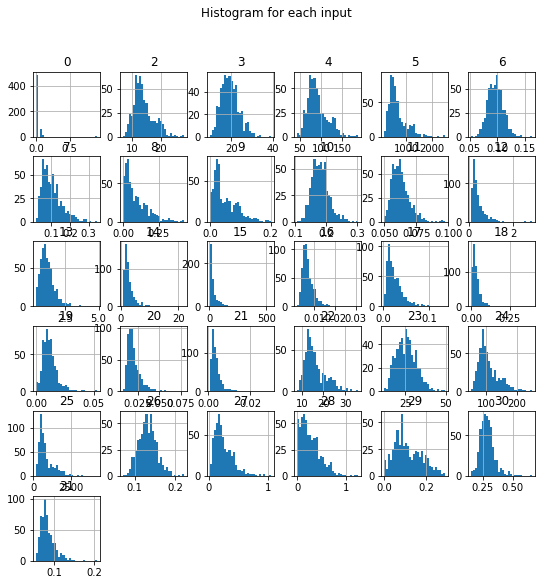

In [11]:
data = pd.read_csv('./wdbc.data', header=None)
import pylab as pl
data.drop(1 ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each input")
plt.savefig('histogram_plots')
plt.show()

In [34]:
X = data[[30, 16]]
y = data[1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.72
Accuracy of Logistic regression classifier on test set: 0.71


c:\users\seana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
